In [8]:
import argparse
import json
from tqdm import tqdm

import transformers



def preprocess(tokenizer, config, example, max_seq_length):
    #问题
    prompt = example["context"]
    #答案
    target = example["target"]
    #问题分词
    prompt_ids = tokenizer.encode(prompt, max_length=max_seq_length, truncation=True)
    #答案分词
    target_ids = tokenizer.encode(
        target,
        max_length=max_seq_length,
        truncation=True,
        add_special_tokens=False)
    input_ids = prompt_ids + target_ids + [config.eos_token_id]
    #input_ids:问题分词+答案分词  seq_len:问题长度
    return {"input_ids": input_ids, "seq_len": len(prompt_ids)}

model_name = "/root/autodl-tmp/models/ChatGLM-6B"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name,trust_remote_code=True)
config = transformers.AutoConfig.from_pretrained( model_name, trust_remote_code=True, device_map='auto')


def read_jsonl(path, max_seq_length):

    len_stast = []
    with open(path, "r",encoding="utf-8") as f:
        for line in tqdm(f.readlines()):
            example = json.loads(line)
            feature = preprocess(tokenizer, config, example, max_seq_length)
            len_stast.append(len(feature['input_ids']))

    return len_stast


res = read_jsonl('data/wenlv_data.jsonl', 1000000)

Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
100%|██████████| 2956/2956 [00:01<00:00, 1626.31it/s]


In [11]:
import pandas as pd

res = pd.Series(res)

In [14]:
len(res)

2956

In [18]:
import matplotlib.pyplot as plt

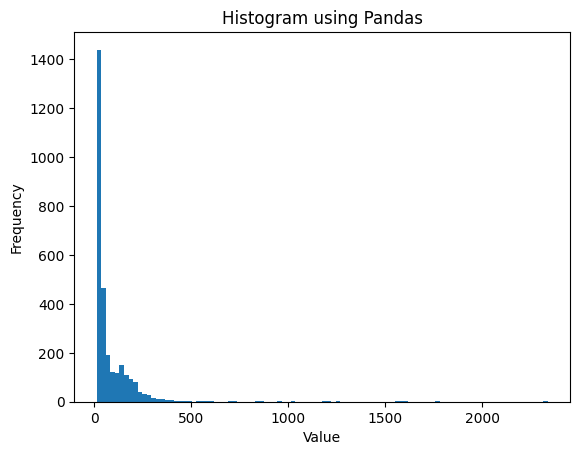

In [19]:
res.plot(kind='hist', bins=100, title='Histogram using Pandas')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

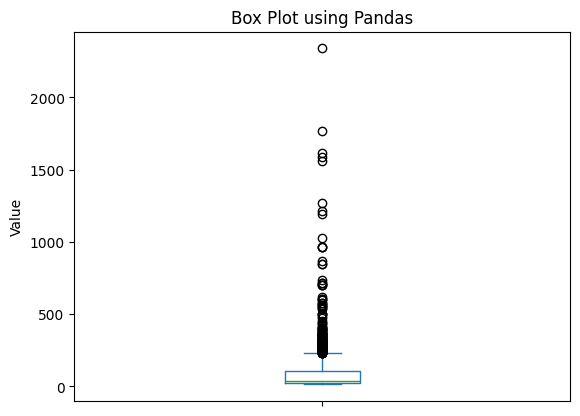

In [23]:
data_series = res.copy()

# 使用Pandas的内置绘图功能绘制箱型图
data_series.plot(kind='box', title='Box Plot using Pandas')
plt.ylabel('Value')
plt.show()

In [25]:
Q1 = data_series.quantile(0.25)
Q3 = data_series.quantile(0.75)
IQR = Q3 - Q1

# 计算1.5倍的四分位距
one_point_five_IQR = 1.5 * IQR
# lower_bound = Q1 - one_point_five_IQR
upper_bound = Q3 + one_point_five_IQR

125.41999323410013